# An example using Feature weighted ECM clustering


In [1]:
## Importing
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score


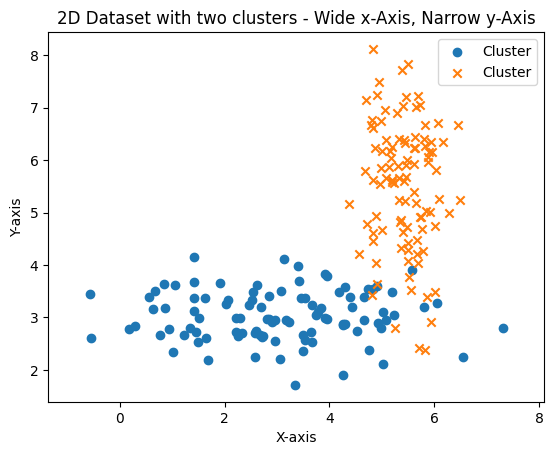

In [3]:
## Generating data set
# Number of samples in the cluster
num_samples = 100

# Mean and covariance for the cluster
mean = [3, 3]
covariance1 = [[2, 0],
               [0, 0.2]]  # Wider along x-axis, narrower along y-axis
cluster1 = np.random.multivariate_normal(mean, covariance1, num_samples)
cluster1 = np.c_[cluster1, np.zeros((cluster1.shape[0], 1))]

mean = [5.5, 5.5]
covariance2 = [[0.2, 0],
               [0, 2]]  # Wider along y-axis, narrower along x-axis
cluster2 = np.random.multivariate_normal(mean, covariance2, num_samples)
cluster2 = np.c_[cluster2, np.ones((cluster2.shape[0], 1))]

dataset = np.vstack([cluster1, cluster2])
df = pd.DataFrame(data=dataset[:, :-1], columns=['X-axis', 'Y-axis'])
plt.scatter(cluster1[:, 0], cluster1[:, 1], marker='o', label='Cluster')
plt.scatter(cluster2[:, 0], cluster2[:, 1], marker='x', label='Cluster')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Dataset with two clusters - Wide x-Axis, Narrow y-Axis')
plt.legend()
plt.axis('equal')
plt.show()

[1, 348.0999760290217]
[2, 323.65068446325245]
[3, 319.36399796069753]
[4, 318.3877852301051]
[5, 318.1636778117442]
[6, 318.07069200623306]
[7, 318.0313642060815]
[8, 318.0151885158369]
[9, 318.00874489178113]
[10, 318.006239212814]
[11, 318.0052802132909]


E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\ecm.py:165: RuntimeWarning: invalid value encountered in power
  J = np.nansum((m ** beta) * D[:, :f - 1] * np.tile(card[:f - 1] ** alpha, (n, 1))) + delta2 * np.nansum(mvide[:f - 1] ** beta)


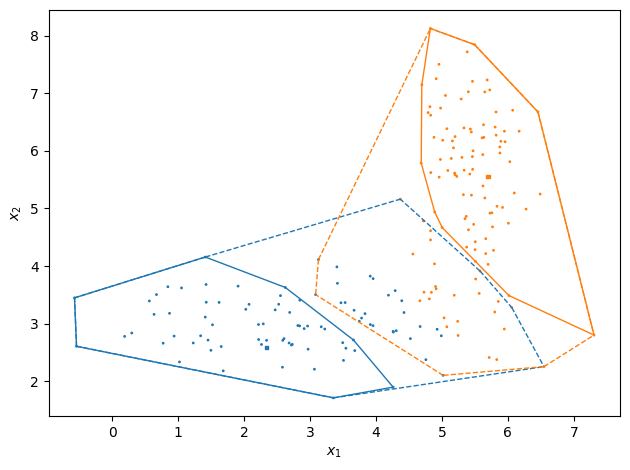

E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\utils.py:875: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_coords = ind_coord.groupby('Cluster').mean()


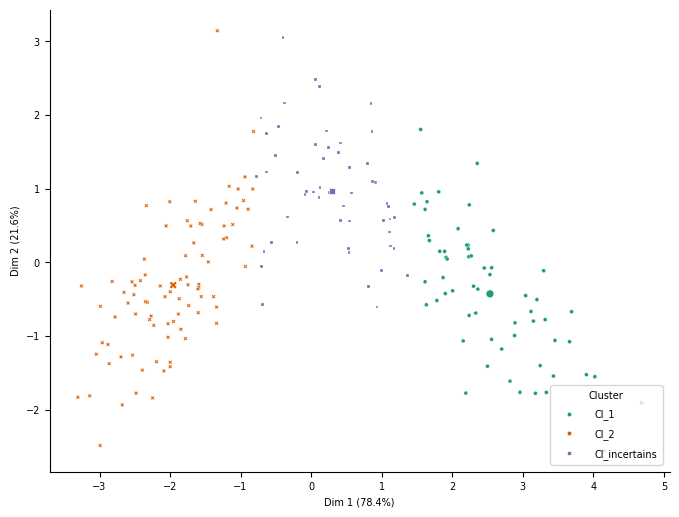

Adjusted Rand Index (ARI): 0.7556930746820094
Silhouette Index (SI): 0.5230183659198289


In [4]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=1.1, alpha=0.1, delta=9)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")

E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\fwecm.py:73: RuntimeWarning: invalid value encountered in power
  mvide[:f - 1] ** beta)


[1, 82.49411839376123]
[2, 76.70091781220711]
[3, 41.405838184974954]
[4, 33.18174207442731]
[5, 31.149959681604212]
[6, 30.763047423398604]
[7, 30.73291793005808]
[8, 30.731489981447403]
[9, 30.731268351329568]


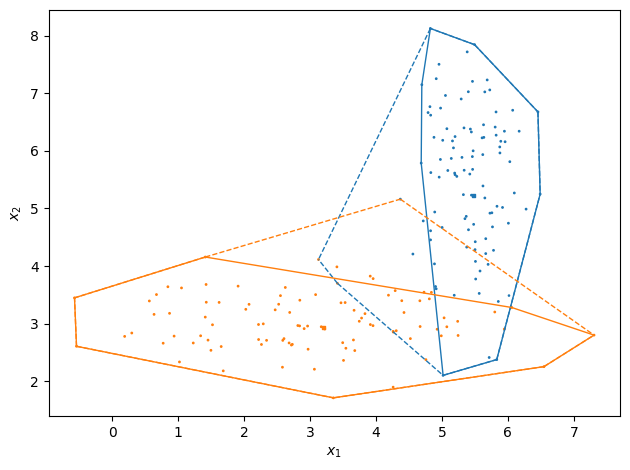

E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\utils.py:875: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_coords = ind_coord.groupby('Cluster').mean()


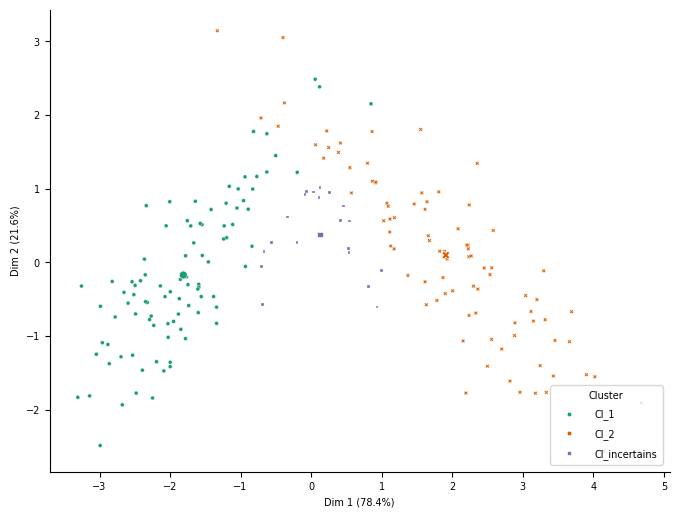

Adjusted Rand Index (ARI): 0.8642177453445731
Silhouette Index (SI): 0.5059438400357287


In [5]:
# Feature weighted ECM clustering
model = fwecm(x=df, c=2, beta=1.1, alpha=0.1, delta=9)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")